In [1]:
pwd

'/Users/mkbelay/Documents/PPOL 564/Data Science Project/PPOL-564-Data-Science-Project/Data Analysis'

In [2]:
##import packages to be used in this session
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Misc
import warnings
warnings.filterwarnings("ignore")

In [3]:
##import project csv file
df=pd.read_csv("COVID_project_PPOL564.csv")

In [4]:
##print shape
df.shape

(974, 31)

In [5]:
##view first 10 observations
df.head(10)

,fips,state,county,cases,white_cases,black_cases,hispanic_cases,native_cases,asian_cases,TOT_POP,...,ownership,residential_seg,food_index,pop_to_phys,water_violation,air_pollution,Uninsured adults raw value,exercise_opp,income_ineq,crime_violent
0,1001,AL,Autauga County,119,44,21,0,0,0,55869,...,0.748946,23.628395,7.2,2220.160000,0.0,11.7,0.111490,0.691301,5.234597,272.282220
1,1003,AL,Baldwin County,201,144,6,0,0,0,223234,...,0.736193,31.825343,8.0,1371.793548,0.0,10.3,0.143485,0.737135,4.417767,203.660396
2,1005,AL,Barbour County,91,5,32,0,0,0,24686,...,0.613978,23.449713,5.6,3158.750000,0.0,11.5,0.160858,0.531668,5.681410,414.277861
3,1007,AL,Bibb County,50,17,5,0,0,0,22394,...,0.750731,52.600206,7.8,2060.727273,0.0,11.2,0.130000,0.162514,4.368581,89.349126
4,1009,AL,Blount County,37,15,0,0,0,0,57826,...,0.786262,17.694495,8.4,4462.538462,0.0,11.7,0.170823,0.156345,4.430262,482.690611
5,1011,AL,Bullock County,125,0,106,0,0,0,10101,...,0.755334,30.618760,4.3,3436.333333,0.0,11.2,0.152410,0.025014,7.410196,311.027333
6,1013,AL,Butler County,263,65,166,0,0,0,19448,...,0.699463,37.511848,6.6,3965.000000,1.0,10.6,0.145058,0.485797,5.423596,581.584005
7,1015,AL,Calhoun County,124,72,23,0,0,0,113605,...,0.694735,40.681183,6.9,1571.616438,0.0,11.8,0.153887,0.477212,5.023896,756.066544
8,1017,AL,Chambers County,301,81,181,0,0,0,33254,...,0.677641,25.672844,6.4,2408.071429,0.0,11.4,0.152263,0.618647,4.744932,528.999736
9,1021,AL,Chilton County,65,27,0,0,0,0,44428,...,0.748493,33.224416,8.1,4896.333333,0.0,11.2,0.175047,0.462938,5.107668,507.810721


Start by examining the data types and making adjustments to prepare for visualization and take notes for high-level pre-processing.

In [6]:
##check data types
df.dtypes

fips                            int64
state                          object
county                         object
cases                           int64
white_cases                     int64
black_cases                     int64
hispanic_cases                  int64
native_cases                    int64
asian_cases                     int64
TOT_POP                         int64
WH                              int64
BA                              int64
AA                              int64
IA                              int64
HI                              int64
GDP                           float64
pov_perc                      float64
Med_inc                        object
Unemployment Rate             float64
traffic_vol                   float64
house_burden                  float64
ownership                     float64
residential_seg               float64
food_index                    float64
pop_to_phys                   float64
water_violation               float64
air_pollutio

Let's convert 'Med_inc'(median household income) to a numeric data type as it is currently object/string data type. Let's also convert 'water_violation' to a categorical data type: this is a binary variable which takes on a value of either 0 or 1 to indicate if a water violation has been reported in the county. 

In [7]:
## remove commas from Med_inc column
df['Med_inc']=df['Med_inc'].str.replace(",","")
##change 'Med_inc' to dtype integer
df['Med_inc']=df['Med_inc'].astype('int')

In [8]:
## change 'water_violation' to dtype category
df['water_violation']=df['water_violation'].astype('category')

Now, we'll look at missingness in our data. This will determine if observations need to be removed; if imputation needs to be considered; or if observations need to be subsetted. 

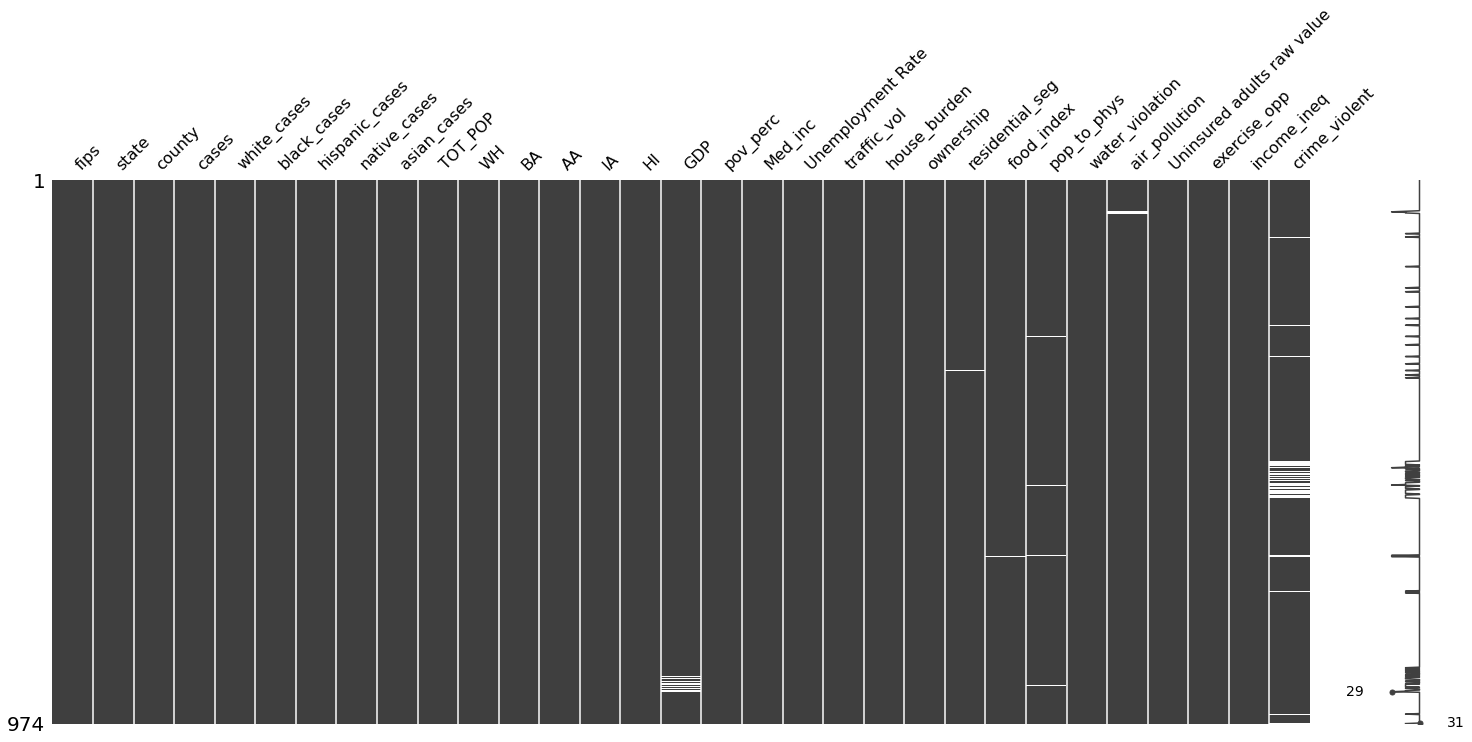

In [9]:
## examine missingness 
miss.matrix(df) 

Looking at the plot above, a couple of the feature variables stand out as having missing values: 'GDP' and 'crime_violent' seem to having the most missing observations, closely followed by 'residential_seg','food_index','pop_to_phys','water_violation', and 'air_pollution'. Next, a numeric description of missingness will be generated to see the extent of missingness and determine how best to deal with missing values. 

In [10]:
##numeric visualization of missingness 
df.isnull().sum()

fips                           0
state                          0
county                         0
cases                          0
white_cases                    0
black_cases                    0
hispanic_cases                 0
native_cases                   0
asian_cases                    0
TOT_POP                        0
WH                             0
BA                             0
AA                             0
IA                             0
HI                             0
GDP                           19
pov_perc                       0
Med_inc                        0
Unemployment Rate              0
traffic_vol                    0
house_burden                   0
ownership                      0
residential_seg                2
food_index                     4
pop_to_phys                    9
water_violation                1
air_pollution                  4
Uninsured adults raw value     0
exercise_opp                   0
income_ineq                    0
crime_viol

The variable 'crime_violent' has the largest number of missing values. The number of violent crimes in a county does directly and indirectly affect the health of a community. However, the other features in this dataframe are highly correlated with violent crime--for instance, reasearch has shown that firearm homicide rates are higher in U.S counties with greater income inequality(https://epi.washington.edu/news/firearm-homicide-rate-higher-us-counties-greater-income-inequality). Additionally, given that this dataset is not that large with just 974 observations, removing 56 observations would be too costly.Therefore, this variable will be excluded from the first attempt at building a predictive model but will be considered for future iterations.  

The other feature variables with missing values are not as obviously correlated with the feature variables without missing values. These feature variables are also important social and environmental factors with immense implications on health. Therefore, these variables will be included in the analysis. For the first attempt at building a predictive model, observations missing values for these feature variables will be removed.

In [11]:
##create modified dataframe ; remove crime_violent column 
df2=df.drop(columns=['crime_violent'])

In [12]:
## remove observations with NAs for all feature variabels 
df2= df2.dropna()

In [13]:
##double check missingness 
df2.isnull().sum()

fips                          0
state                         0
county                        0
cases                         0
white_cases                   0
black_cases                   0
hispanic_cases                0
native_cases                  0
asian_cases                   0
TOT_POP                       0
WH                            0
BA                            0
AA                            0
IA                            0
HI                            0
GDP                           0
pov_perc                      0
Med_inc                       0
Unemployment Rate             0
traffic_vol                   0
house_burden                  0
ownership                     0
residential_seg               0
food_index                    0
pop_to_phys                   0
water_violation               0
air_pollution                 0
Uninsured adults raw value    0
exercise_opp                  0
income_ineq                   0
dtype: int64

In [14]:
##view dataframe
df2.shape

(936, 30)

Before we begin exploring this data, we need to split it into a training and test dataset. Since the outcome variable has not been generated just yet, we will start by creating the outcome variable, then the data will be split into training and test.

### Step 1: Create Outcome Variable
The goal of this project is to examine the factors that lead to racial and ethnic health disparities among racial and ethnic minority population in COVID-19 cases. The outcome variable will be generated by: 
1. Calculating the COVID-19 percentage share by race and ethnicity for each county
2. Calculating the racial/ethnic distribution of populations for each county
3. Subtracting the COVID-19 case percentage from the population percentage for each race/ethnicity in each county. If the value is positive, it is indicative of a disparity in COVID-19 cases for that race/ethnicity; if the value is equal to 0, the COVID-19 cases for that race/ethnicity is the same as their population; lastly, if the value is negative, the COVID-19 cases for that race/ethnicity is less than their share of the population. This disparity metric calculation was taken from the CDC: https://www.cdc.gov/nchs/nvss/vsrr/covid19/health_disparities.htm. Note: unlike the CDC metric, the outcome variable for all ethnic/racial minorities will be one. That is, the COVID-19 cases and county population for black, hispanic, native american, and asian persons will be summed together to create this metric.

#### 1. Calculating the COVID-19 percentage share by race and ethnicity for each county

In [15]:
##sum COVID cases count for black, hispanic, native american, and asian 
df2['cases_min_pop']=df2['black_cases']+df2['hispanic_cases']+df2['native_cases']+df2['asian_cases']
##calculate percentage share of total cases
df2['cases_min_pop']=df2['cases_min_pop']/df2['cases']

#### 2. Calculating the racial/ethnic distribution of populations for each county

In [16]:
## sum population count for black, hispanic, native american, and asian 
df2['min_pop']=df2['BA']+df2['AA']+df2['IA']+df2['HI']
##calculate percentage out of total population
df2['min_pop']=df2['min_pop']/df2['TOT_POP']

#### 3. Subtracting the COVID-19 case percentage from the population percentage for each race/ethnicity in each county.

In [17]:
##create disparity index
df2['disp_index']=df2['cases_min_pop']-df2['min_pop']
##multiply by 100
df2['disp_index'] = df2['disp_index'].apply(lambda x: x*100)

In [18]:
##check dtype
df2.disp_index.dtypes

dtype('float64')

### Step 2: Separate into training and test data sets

In [19]:
## isolate outcome from features
y = df2[['disp_index']]
X = df2.drop(columns=['disp_index'])

In [20]:
## split in to training (75% of data) and test (25% of data); set random state to replicate same split every time
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [21]:
##check shape to confirm split
print(train_X.shape[0]/df2.shape[0])
print(test_X.shape[0]/df2.shape[0])

0.75
0.25


### Step 3: Explore training dataset

In [1]:
##view first 20 observations
train_X.head(20)

NameError: name 'train_X' is not defined

__What is the distribution of the feature variables?__

Check the distribution of all continious variables coded with dtype 'int'.

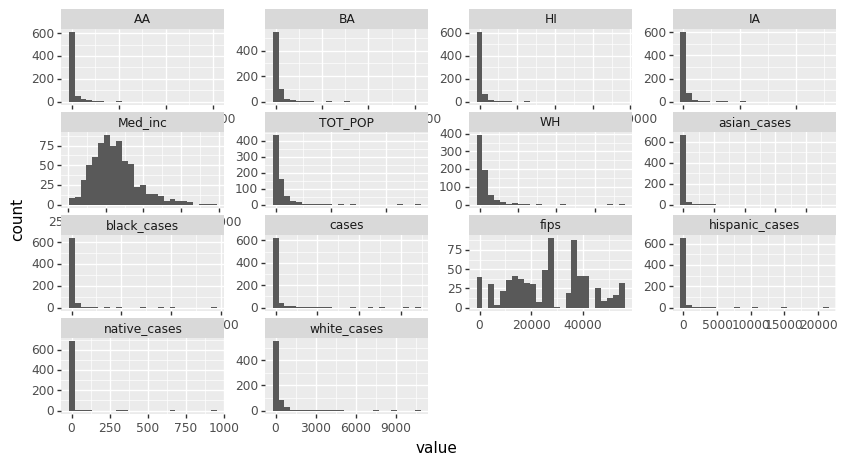

<ggplot: (8762078960005)>

In [23]:
## view continous int variables
d = train_X.select_dtypes(include="int").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

The 'fips' variable will not be included in the model. Apart from the median income variable ('Med_inc'), the rest of the variables have a right skew. These variables represent a county's population and a county's COVID-19 cases by racial and ethnic groups. Let's log these variables and see how their distribution changes

In [24]:
## check if any of the variables have a value of 0 before taking their log
print((train_X == 0).sum())

fips                            0
state                           0
county                          0
cases                           0
white_cases                    52
black_cases                   339
hispanic_cases                434
native_cases                  666
asian_cases                   590
TOT_POP                         0
WH                              0
BA                              0
AA                              0
IA                              0
HI                              0
GDP                             0
pov_perc                        0
Med_inc                         0
Unemployment Rate               0
traffic_vol                     0
house_burden                    0
ownership                       0
residential_seg                 0
food_index                      0
pop_to_phys                     0
water_violation               414
air_pollution                   0
Uninsured adults raw value      0
exercise_opp                    2
income_ineq   

Variables to add 1 to when logging: white_cases, black_cases, hispanic_cases, native_cases, asian_cases, water_violation, exercise_opp. Note that cases_min_pop represents the sum of COVID-19 cases for black, asian, hispanic, and native american population. It was generated to create the outcome variable; it will not be included in the model. 

In [25]:
## check min value to confirm absence of negative values before taking the log of any of the variables
print(train_X.min())

fips                                1001
state                                 AL
county                        Ada County
cases                                  5
white_cases                            0
black_cases                            0
hispanic_cases                         0
native_cases                           0
asian_cases                            0
TOT_POP                             4033
WH                                   933
BA                                    44
AA                                    10
IA                                     9
HI                                    63
GDP                               111976
pov_perc                             2.6
Med_inc                            26449
Unemployment Rate                    1.7
traffic_vol                      2.06772
house_burden                   0.0509467
ownership                       0.196073
residential_seg                  2.43358
food_index                           1.5
pop_to_phys     

In [26]:
##log variables
d = train_X.copy()
## asian american population
d['ln_AA'] =  np.log(d['AA'])
## black american population
d['ln_BA'] =  np.log(d['BA'])
## native american population
d['ln_IA'] =  np.log(d['IA'])
## hispanic population
d['ln_HI'] =  np.log(d['HI'])
## white population
d['ln_WH'] =  np.log(d['WH'])
## total county population
d['ln_TOT_POP'] =  np.log(d['TOT_POP'])
## total covid cases in county
d['ln_cases'] =  np.log(d['cases'])
## asian american cases
d['ln_AAcases'] =  np.log(d['asian_cases'] + 1)## add 1 to avoid loggin 0s
## black american cases
d['ln_BAcases'] =  np.log(d['black_cases'] + 1)## add 1 to avoid loggin 0s
## native american cases
d['ln_IAcases'] =  np.log(d['native_cases'] + 1)## add 1 to avoid loggin 0s
## hispanic cases
d['ln_HIcases'] =  np.log(d['hispanic_cases'] + 1)## add 1 to avoid loggin 0s
## white cases 
d['ln_WHcases'] =  np.log(d['white_cases'] + 1)## add 1 to avoid loggin 0s

In [27]:
##keep only logged variables
d=d.loc[:, d.columns.str.startswith('ln')]
##transform from wide to long for visualization
d=d.melt()

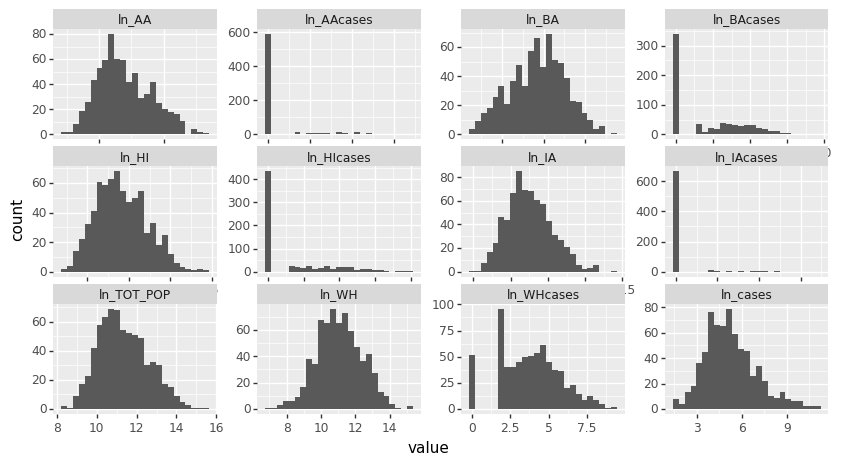

<ggplot: (8762078960059)>

In [28]:
##visualize
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

While logging seems to have normalized the distribution of the population variables, the racial and ethnic breakdown of COVID-19 cases has not normalized. While turning these variables into categories is an option, it would mean loosing information. Given that this data set is lacking in size and representation due to reporting inconsistencies, let's keep the variables as is for the the first attempt at the model. Next, let us visualize the continious variables with dtype=float.

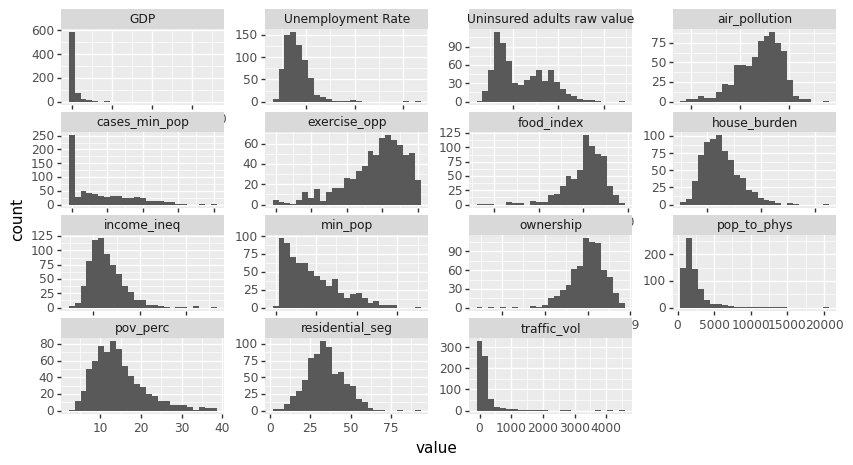

<ggplot: (8762078471108)>

In [29]:
## view continious float variables
e = train_X.select_dtypes(include="float").melt()
(
    ggplot(e,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

The variables min_pop and cases_min_pop will not be included in the model since they were generated to create the outcome variable. GDP, Unemployment Rate, ownership, pop_to_phys, and traffic volume seem to have a pronounced skew. Let us log these variables and see how they look: 
    

In [30]:
##log variables
d = train_X.copy()
##GDP
d['ln_GDP'] =  np.log(d['GDP'])
## unemployment rate
d['ln_Unemployment Rate'] =  np.log(d['Unemployment Rate'])
## ownership
d['ln_ownership'] =  np.log(d['ownership'])
## ratio of physician to population
d['ln_pop_to_phys'] =  np.log(d['pop_to_phys'])
## traffic volume
d['ln_traffic_vol'] =  np.log(d['traffic_vol'])

In [31]:
##keep only logged variables
d=d.loc[:, d.columns.str.startswith('ln')]
##transform from wide to long for visualization
d=d.melt()

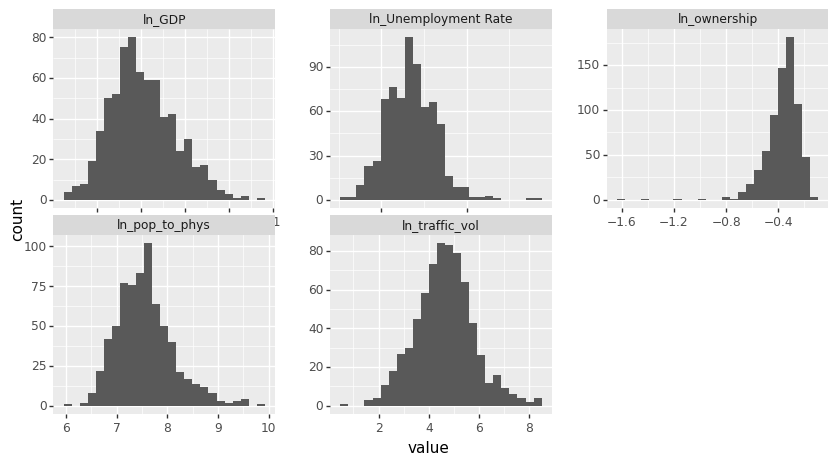

<ggplot: (8762077567711)>

In [32]:
##visualize
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

Logging seems to have normalized most of the variables, however, the variable 'ownership', which indicates the percentage of occupied households that are owned, has not benefitted from logging. Since we want to maintain as much information as possible, this variable will be left as is in its logged form for now.

Now let us look at the distribution of the only categorical variable. Based on the data source, "1 means “Yes” and indicates that at least one community water system in the county received at least one health-based violation during the specified time frame. 0 means “No” and indicates that there were no health-based drinking water violations in any community drinking water system in the county."https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/county-health-rankings-model/health-factors/physical-environment/air-water-quality/drinking-water-violations



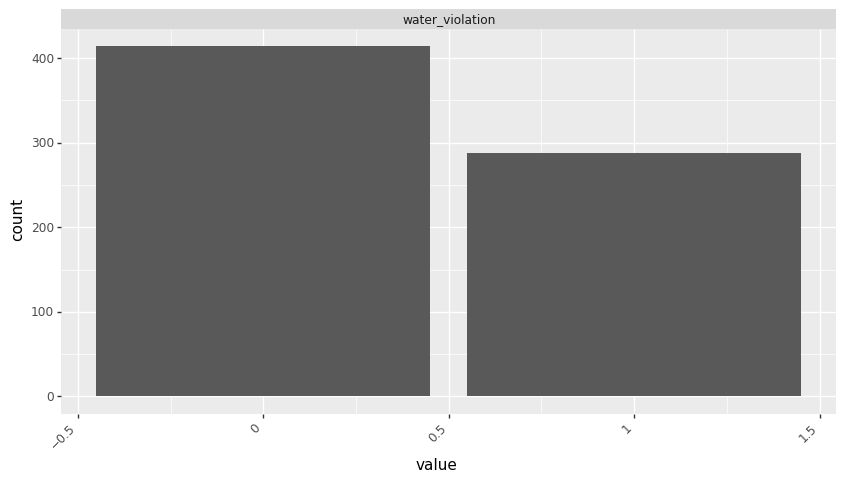

<ggplot: (8762077562079)>

In [33]:
##categorical variables
f = train_X.select_dtypes(include="category").melt()
(
    ggplot(f,aes(x="value")) +
    geom_bar() +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25,
                           'hspace':0.75},
         axis_text_x=element_text(rotation=45, hjust=1))
)

Majority of the counties in the training data set have not recieved a health-based drinking water violation in 2018. Conversely, over 200 counties have recieved a  health-based drinking water violation in 2018.

__What is the distribution of the outcome variable?__

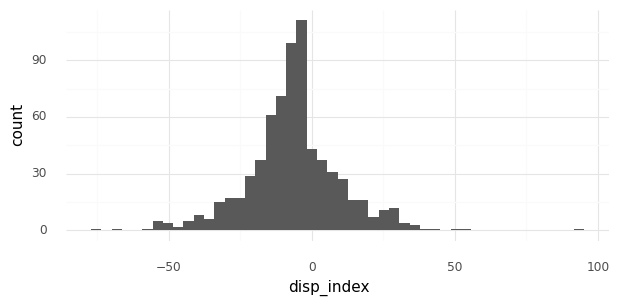

<ggplot: (8762079272418)>

In [34]:
##distribution of outcome variable
(
    ggplot(train_y,
           aes(x="disp_index")) +
    geom_histogram() +
    theme_minimal() +
    theme(figure_size = (7,3)) 
)

It appears that, for majority of the counties represented in the training data set, the disparity index has a value less than zero (i.e., no disparity).

### Step 4:  High-level preprocessing

Based on the data exploration above, we will log some of the variables.We will avoid binning for this attempt inorder to retain as much information as possible.

#### `AA`: Asian American Population

In [35]:
df2['AA'] =  np.log(df2['AA'])

#### `BA`: Black  Population

In [36]:
df2['BA'] =  np.log(df2['BA'])

#### `IA`: Native American Population

In [37]:
df2['IA'] =  np.log(df2['IA'])

#### `HI`: Hispanic  Population

In [38]:
df2['HI'] =  np.log(df2['HI'])

#### `WH`: White Population

In [39]:
df2['WH'] =  np.log(df2['WH'])

#### `TOT_POP`: Total County Population

In [40]:
df2['TOT_POP'] =  np.log(df2['TOT_POP'])

#### `cases`: County-Level Total COVID-19 Cases

In [41]:
df2['cases'] =  np.log(df2['cases'])

#### `asian_cases`: County-Level Asian American COVID-19 Cases

In [42]:
df2['asian_cases'] =  np.log(df2['asian_cases'] + 1)## add 1 to avoid logging 0s

#### `black_cases`: County-Level Black COVID-19 Cases

In [43]:
df2['black_cases'] =  np.log(df2['black_cases'] + 1)## add 1 to avoid logging 0s

#### `native_cases`: County-Level Native American COVID-19 Cases

In [44]:
df2['native_cases'] =  np.log(df2['native_cases'] + 1)## add 1 to avoid logging 0s

#### `hispanic_cases`: County-Level Hispanic COVID-19 Cases

In [45]:
df2['hispanic_cases'] =  np.log(df2['hispanic_cases'] + 1)## add 1 to avoid logging 0s

#### `white_cases`: County-Level White COVID-19 Cases

In [46]:
df2['white_cases'] =  np.log(df2['white_cases'] + 1)## add 1 to avoid logging 0s

#### `GDP`: County-Level GDP

In [47]:
df2['GDP'] =  np.log(df2['GDP'] )

#### `Unemployment Rate`: County-Level Unemployment Rate

In [48]:
df2['Unemployment Rate'] =  np.log(df2['Unemployment Rate'])

#### `ownership`: County-Level Homeownership

In [49]:
df2['ownership'] =  np.log(df2['ownership'])

#### `pop_to_phys`: County-Level Ration of Physician to Population

In [50]:
df2['pop_to_phys'] =  np.log(df2['pop_to_phys'])

#### `traffic_vol`: County-Level Traffic Volume

In [51]:
df2['traffic_vol'] =  np.log(df2['traffic_vol'])

### Step 5: Resplit data

In [52]:
df2.columns

Index(['fips', 'state', 'county', 'cases', 'white_cases', 'black_cases',
       'hispanic_cases', 'native_cases', 'asian_cases', 'TOT_POP', 'WH', 'BA',
       'AA', 'IA', 'HI', 'GDP', 'pov_perc', 'Med_inc', 'Unemployment Rate',
       'traffic_vol', 'house_burden', 'ownership', 'residential_seg',
       'food_index', 'pop_to_phys', 'water_violation', 'air_pollution',
       'Uninsured adults raw value', 'exercise_opp', 'income_ineq',
       'cases_min_pop', 'min_pop', 'disp_index'],
      dtype='object')

In [53]:
## isolate outcome and features
y = df2[['disp_index']]
## drop irrelevant columns when isolating features from outcome
X = df2.drop(columns=['disp_index','fips','state','county','cases_min_pop','min_pop' ])

In [54]:
## split in to training (75% of data) and test (25% of data); set random state to replicate same split every time
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [55]:
##check shape to confirm split
print(train_X.shape[0]/df2.shape[0])
print(test_X.shape[0]/df2.shape[0])

0.75
0.25


### Step 6:  Pre-Processing

Let's rescale our training data for now, this will be added to the modeling pipeline later.

In [56]:
## scale so variables are on the same scale.
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [57]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,cases,white_cases,black_cases,hispanic_cases,native_cases,asian_cases,TOT_POP,WH,BA,AA,...,house_burden,ownership,residential_seg,food_index,pop_to_phys,water_violation,air_pollution,Uninsured adults raw value,exercise_opp,income_ineq
0,0.606195,0.655437,0.645696,0.632611,0.0,0.0,0.543209,0.623315,0.613770,0.504936,...,0.300735,0.837878,0.509286,0.8250,0.411108,1.0,0.715517,0.145675,0.933457,0.215057
1,0.248076,0.323072,0.000000,0.000000,0.0,0.0,0.285146,0.417288,0.234676,0.287056,...,0.245681,0.905259,0.182761,0.8250,0.574373,0.0,0.353448,0.105534,0.493908,0.208411
2,0.404570,0.311709,0.000000,0.455082,0.0,0.0,0.455225,0.557463,0.454414,0.467153,...,0.201076,0.788884,0.330206,0.8250,0.379477,0.0,0.646552,0.832700,0.670318,0.166752
3,0.246075,0.311709,0.000000,0.000000,0.0,0.0,0.407231,0.513914,0.467253,0.425328,...,0.644857,0.750419,0.454182,0.7875,0.285288,0.0,0.396552,0.624740,1.000000,0.230767
4,0.461764,0.557605,0.390517,0.441211,0.0,0.0,0.571222,0.644232,0.637635,0.614298,...,0.165169,0.953424,0.267386,0.8875,0.325619,1.0,0.646552,0.337869,0.650080,0.171983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.235452,0.224255,0.000000,0.195373,0.0,0.0,0.194698,0.328527,0.186890,0.299278,...,0.301525,0.704901,0.090756,0.8375,0.278743,1.0,0.103448,0.424950,0.831272,0.346980
698,0.248076,0.366799,0.000000,0.000000,0.0,0.0,0.444810,0.543065,0.412797,0.605818,...,0.529997,0.668188,0.370785,0.6875,0.317772,0.0,0.508621,0.105513,0.931362,0.426775
699,0.292646,0.389416,0.000000,0.000000,0.0,0.0,0.507578,0.607965,0.344327,0.473393,...,0.298247,0.856113,0.411005,0.7500,0.148573,1.0,0.327586,0.324443,0.634122,0.302359
700,0.271127,0.370335,0.000000,0.000000,0.0,0.0,0.463438,0.550292,0.563318,0.501302,...,0.224243,0.777320,0.359289,0.7125,0.336945,0.0,0.724138,0.100404,0.547265,0.198471


### Step 6: Modeling

We have a continuously distributed outcome variable i.e., a regression problem.Let's test how these models perform

- Linear Regression 
- KNN
- Decision Trees
- Bagging 
- Random Forest

In [58]:
## set fold generator to split and test on same data across models
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

Let's run each model individually then compare the performance of the different models in a plot.

We'll use **mean squared error** as our performance metrics.

In [59]:
## performance metric 
use_metrics = ["neg_mean_squared_error"]

#### Linear Model

In [60]:
lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

#### KNN

In [61]:
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

#### Decision Tree

In [62]:
dt_scores = cross_validate(DTree(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

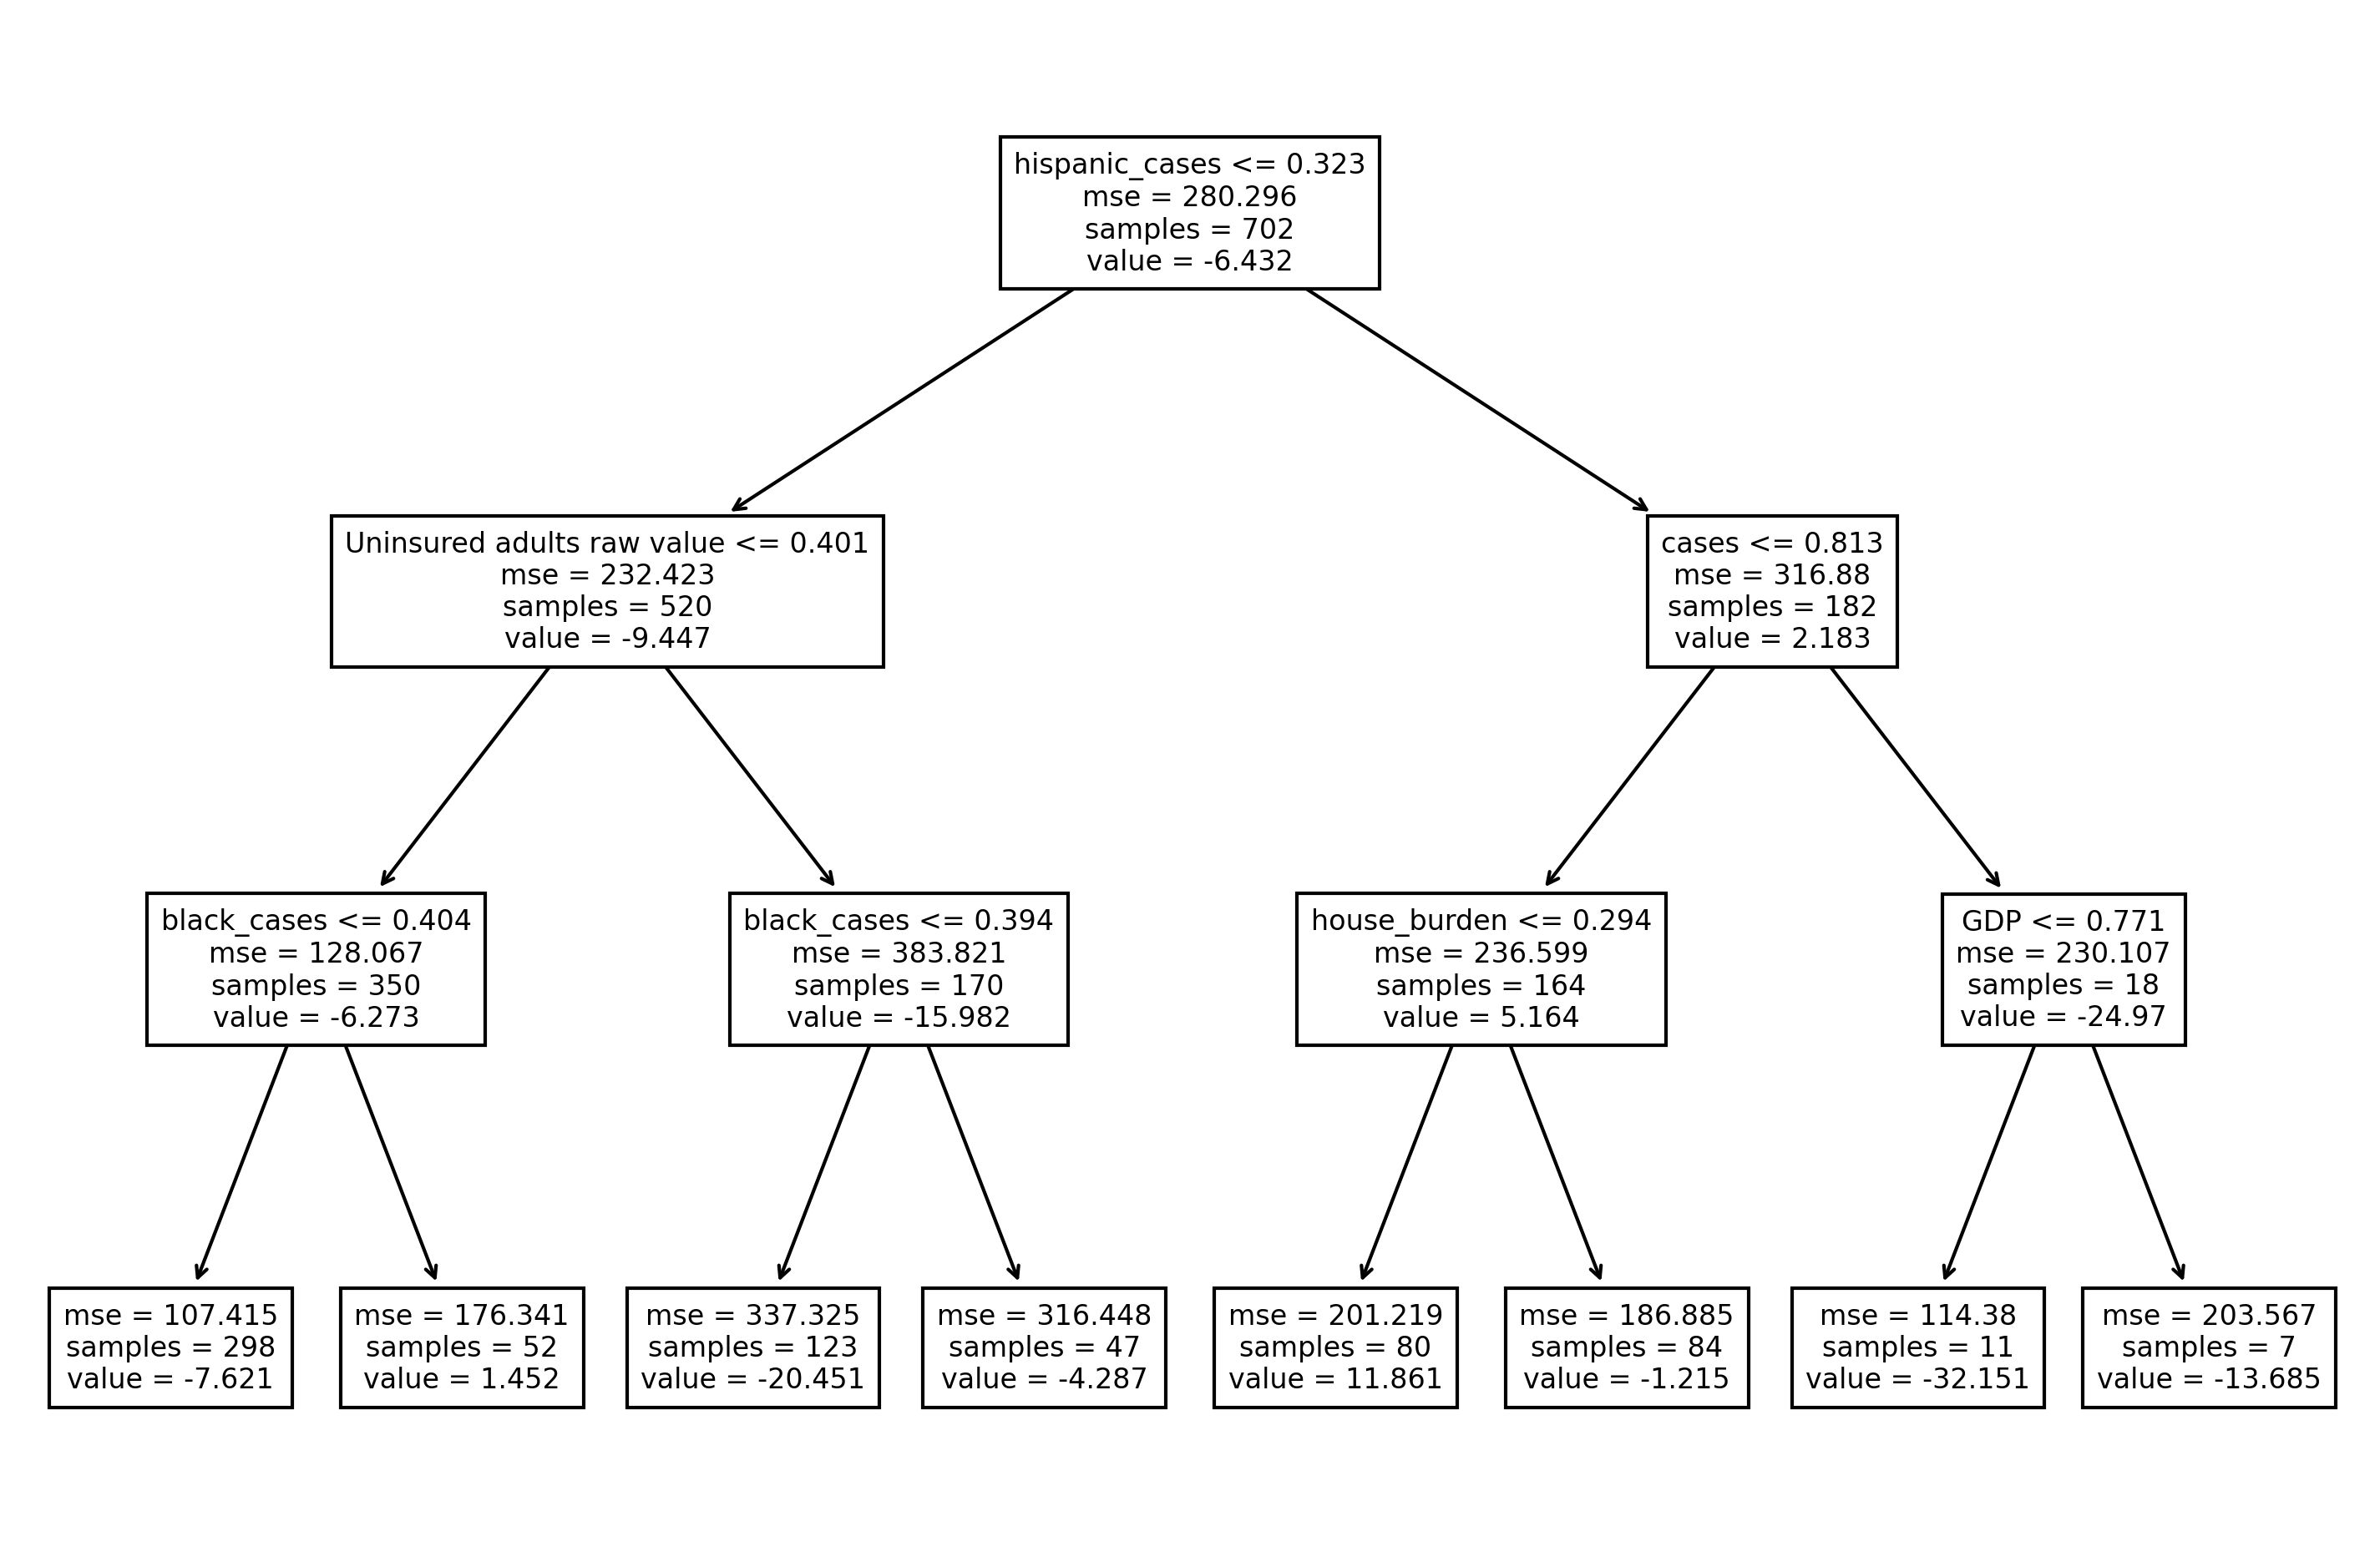

In [63]:
## let's visualize the decision tree's decisions

mod = DTree(max_depth=3) # Initialize the modeling object 
mod.fit(train_X,train_y) # Fit the model

# Plot the tree
plt.figure(figsize=(12,8),dpi=300)
rules = tree.plot_tree(mod,feature_names = col_names,fontsize=8)

#### Bagging

In [64]:
bag_scores = cross_validate(Bag(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

#### Random Forest

In [65]:
rf_scores = cross_validate(RF(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

Let's collect the scores from each model and compare their performance. 

In [66]:
# Collect all the metrics we care about as a dictionary 
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores)
collect_scores

,lm,knn,dt,bag,rf
0,180.132696,184.077286,333.965351,183.785987,161.462876
1,246.892730,321.285643,469.518550,281.633835,255.299549
2,170.403583,173.634939,274.654644,157.191657,139.487417
3,131.450722,143.753891,459.443544,134.721653,110.366741
4,143.915014,192.218854,334.467653,162.347678,123.043085


In [67]:
##rename models
collect_scores=collect_scores.rename(columns={'lm':'Linear Model', 'knn':'KNN', 'dt':'Decision Tree', 'bag':'Bagging','rf':'Random Forest'})

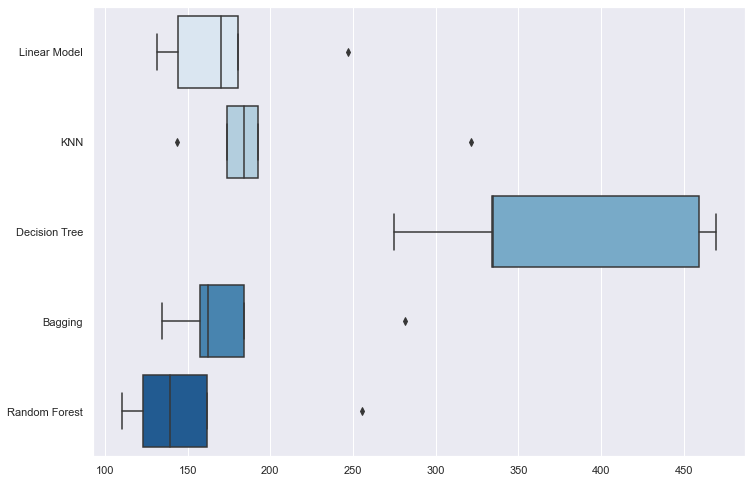

In [69]:
## let's visualize using seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=collect_scores, orient="h", palette="Blues")

Let's use ggplot for visualization, too.

In [70]:
##turn from wide to long for visualization
collect_scores=collect_scores.melt(var_name="Model",value_name="MSE")

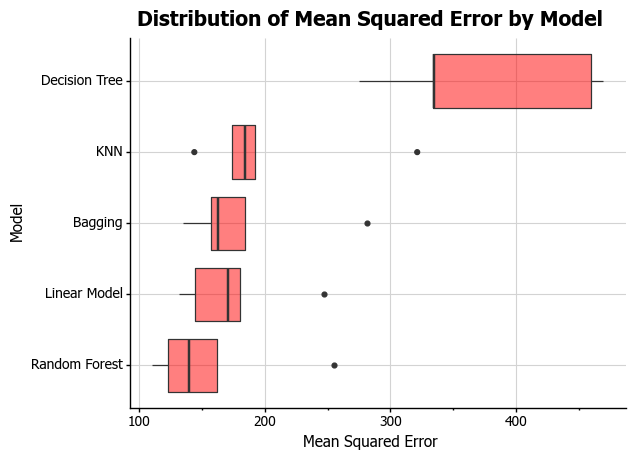

<ggplot: (8762077516969)>

In [71]:
# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
MSE_model_1=(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot(fill="red", alpha=0.5) +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    ##scale_color_brewer(palette="Blues") +
    coord_flip() + theme_classic()+ ggtitle("Distribution of Mean Squared Error by Model")
    + theme(dpi=100,
        legend_position="bottom",
        legend_direction="horizontal",
        legend_title_align="center",
        legend_box_spacing=0.4,
        legend_key=element_blank(),
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=15, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=11),
        axis_text_x=element_text(colour="black", size=10),
        axis_text_y=element_text(colour="black", size=10),
    )

)
MSE_model_1
##MSE_model_1.save("myplot.png")

The Random Forest performed best followed by Linear Model, Bagging, KNN, and Decision Tree. 

### Tuning: KNN, Decision Tree, and Random Forest 

#### KNN

In [101]:
## try different number of neighbours to see which does best
knn_tune_params = {'n_neighbors':[1, 10, 25, 35, 50, 75, 100, 250]}

In [102]:
## wrap tuning parameter in GridSearchCV
tune_knn = GridSearchCV(KNN(),knn_tune_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [103]:
## fit model
tune_knn.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=4,
             param_grid={'n_neighbors': [100, 250]},
             scoring='neg_mean_squared_error')

In [104]:
## see best parameter: how many neighbours?
tune_knn.best_params_

{'n_neighbors': 100}

In [105]:
## what is the best score?
tune_knn.best_score_

-255.2947621067317

#### Decision Tree 

In [106]:
## try different number for the 'max_depth' parameter
tune_dt = GridSearchCV(DTree(),{'max_depth':[i for i in range(20)]},
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [107]:
## fit model
tune_dt.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring='neg_mean_squared_error')

In [108]:
## best parameter
tune_dt.best_params_

{'max_depth': 3}

In [109]:
## what is the best score
tune_dt.best_score_

-235.27481895091083

#### Random Forest

In [110]:
## try different number for the 'max_depth','n_estimators', and 'max_features' parameters
rf_params = {'max_depth':[5, 10, 20],
             'n_estimators':[100,500,1000],
              'max_features': [10,20,30]}  

In [111]:
## wrap parameters in GridSearchCV
tune_rf = GridSearchCV(RF(),rf_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [112]:
## fit the model
tune_rf.fit(train_X,train_y) 

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [5, 10, 20], 'max_features': [10, 20, 30],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [113]:
## best configurations for parameters
tune_rf.best_params_

{'max_depth': 20, 'max_features': 20, 'n_estimators': 100}

In [114]:
## best score
tune_rf.best_score_

-157.6932015664441

After trying different configurations for the parameters, the Random Forest performed the best. The insights from tuning (i.e,. how to configure parameters) will be incorporated in the modeling pipeline below.

### Modeling Pipeline

In [116]:
# (0) Split the data 
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=123)

# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['cases', 'white_cases', 'black_cases', 'hispanic_cases', 'native_cases',
       'asian_cases', 'TOT_POP', 'WH', 'BA', 'AA', 'IA', 'HI', 'GDP',
       'pov_perc', 'Med_inc', 'Unemployment Rate', 'traffic_vol',
       'house_burden', 'ownership', 'residential_seg', 'food_index',
       'pop_to_phys', 'water_violation', 'air_pollution', 'Uninsured adults raw value',
       'exercise_opp', 'income_ineq'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[1, 10, 25, 35, 50, 75, 100, 250]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[i for i in range(20)]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[5, 10, 20],
     'model__n_estimators':[100,500,1000],
     'model__max_features': [10,20,30]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['cases',
                                                                          'white_cases',
                                                                          'black_cases',
                                                                          'hispanic_cases',
                                                                          'native_cases',
                                                                          'asian_cases',
                                                                          'TOT_POP',
                                                                          'WH',
            

In [117]:
## what is the best score
search.best_score_

-156.85433378490654

In [118]:
## which parameter configuration performed best?
search.best_params_

{'model': RandomForestRegressor(max_depth=20, max_features=20, n_estimators=500),
 'model__max_depth': 20,
 'model__max_features': 20,
 'model__n_estimators': 500}

In [119]:
## which model performed best
search.best_estimator_

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['cases', 'white_cases',
                                                   'black_cases',
                                                   'hispanic_cases',
                                                   'native_cases',
                                                   'asian_cases', 'TOT_POP',
                                                   'WH', 'BA', 'AA', 'IA', 'HI',
                                                   'GDP', 'pov_perc', 'Med_inc',
                                                   'Unemployment Rate',
                                                   'traffic_vol',
                                                   'house_burden', 'ownership',
                                                   'residential_seg',
                                                   'food_index', 'pop_to_phys',
           

In [122]:
## save model and parameter configurations into an object for further exploration below
rf_mod = search.best_estimator_

Eventhough our best model is performing poorly, let us explore how it used the variables it was fed. This can inform pre-processing and modeling steps used in future attempts.

In [120]:
from sklearn.inspection import permutation_importance

In [123]:
## let's shuffle the variables 50 times and see which variables the model relied on and which ones it relied the least on
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=50)

In [124]:
## organize shuffle results as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

In [125]:
## generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

In [126]:
# arrange dataframe in order from most to least important variables 
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)
vi_dat

,variable,vi,std,low,high
0,hispanic_cases,0.662724,0.030876,0.600971,0.724476
1,black_cases,0.500779,0.031551,0.437678,0.563880
2,house_burden,0.182469,0.014173,0.154123,0.210814
3,Uninsured adults raw value,0.156483,0.012373,0.131737,0.181229
4,HI,0.121608,0.007057,0.107495,0.135721
5,BA,0.121136,0.006954,0.107228,0.135044
6,cases,0.082961,0.003692,0.075577,0.090345
7,white_cases,0.063546,0.004319,0.054909,0.072184
8,ownership,0.046808,0.004914,0.036980,0.056637
9,asian_cases,0.026959,0.002661,0.021637,0.032281


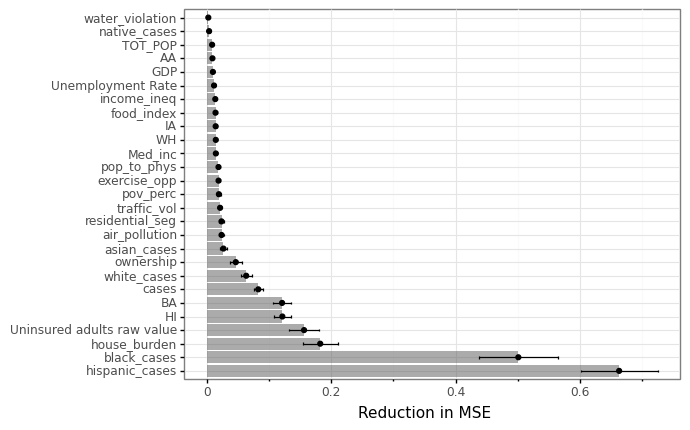

<ggplot: (8762079070983)>

In [128]:
## visualize the dataframe above using ggplot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in MSE",x="")
)

The top five variables the model relied on are: number of hispanic cases in a county; number of black cases in a county; housing burden in a county; number of uninsured adults in a county; and hispanic population in a county. Given that the outcome variable was derived using the COVID-19 cases and county population variables, it is not surprising the model relied on them the most. However, the model also relied on a county's measure of housing burden and number of uninsured adults to make its prediction. It would be interesting to see if these variables remain important throughout future modeling attempts with different pre-processing decisions and different variables. 

Next, partial dependancy plot will be created to further explore the top five variables.

In [130]:
## import requred packages
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance
from pdpbox import pdp

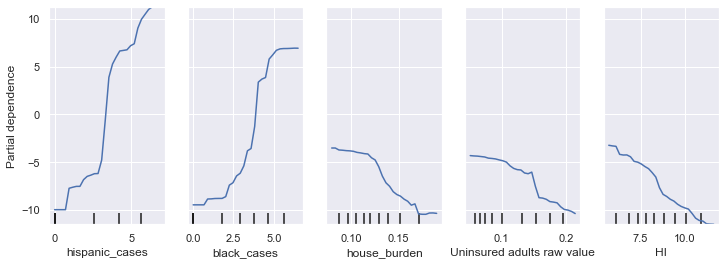

In [131]:
# Target specific features
features = ['hispanic_cases','black_cases','house_burden','Uninsured adults raw value','HI']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

It looks like an increase in hispanic cases and black casses is associted with an increase in disparity. However, an increase in housing burden; number of uninsured adults; and the hispanic population in a county is associated with a decrease in disparity--that housing burden and uninsured adults are negatively correlated with disparity seems a bit odd. 

Now let's look at how some of these variables interact with one another

In [137]:
##hispanic cases and house_burden
inter1  =  pdp.pdp_interact(model = rf_mod, 
                            dataset = train_X,
                            model_features = train_X.columns,
                            features=["hispanic_cases",'house_burden'])

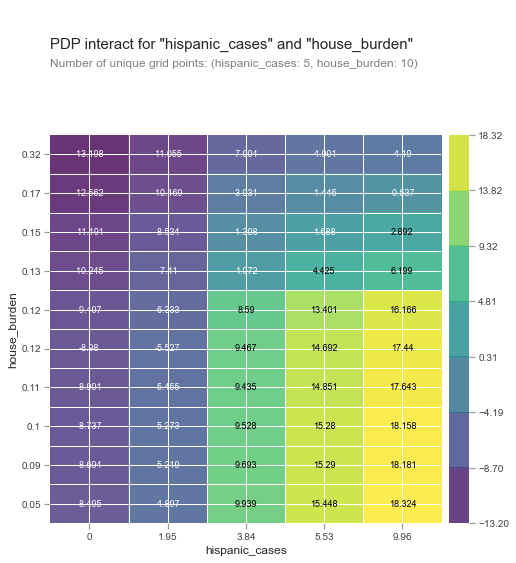

In [140]:
## plot
fig,ax = pdp.pdp_interact_plot(pdp_interact_out=inter1, 
                               feature_names=["hispanic_cases",'house_burden'],
                               plot_type="grid")

In [141]:
##black cases and house_burden
inter2  =  pdp.pdp_interact(model = rf_mod, 
                            dataset = train_X,
                            model_features = train_X.columns,
                            features=["black_cases",'house_burden'])

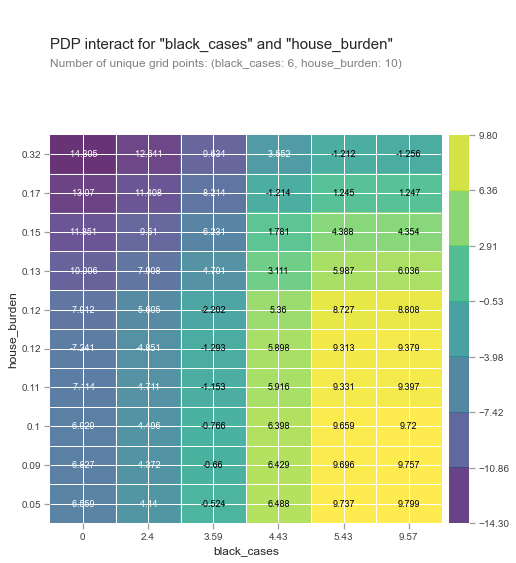

In [142]:
## plot
fig,ax = pdp.pdp_interact_plot(pdp_interact_out=inter2, 
                               feature_names=["black_cases",'house_burden'],
                               plot_type="grid")

In [143]:
##hispanic cases and uninsured
inter3  =  pdp.pdp_interact(model = rf_mod, 
                            dataset = train_X,
                            model_features = train_X.columns,
                            features=["hispanic_cases",'Uninsured adults raw value'])

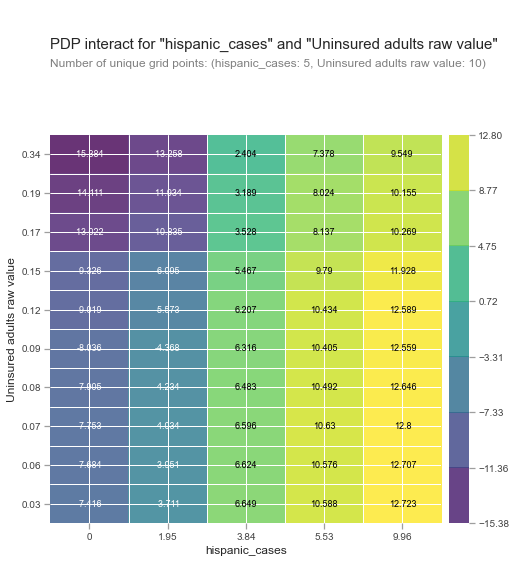

In [144]:
## plot
fig,ax = pdp.pdp_interact_plot(pdp_interact_out=inter3, 
                               feature_names=["hispanic_cases",'Uninsured adults raw value'],
                               plot_type="grid")

In [145]:
##black cases and uninsured
inter4  =  pdp.pdp_interact(model = rf_mod, 
                            dataset = train_X,
                            model_features = train_X.columns,
                            features=["black_cases",'Uninsured adults raw value'])

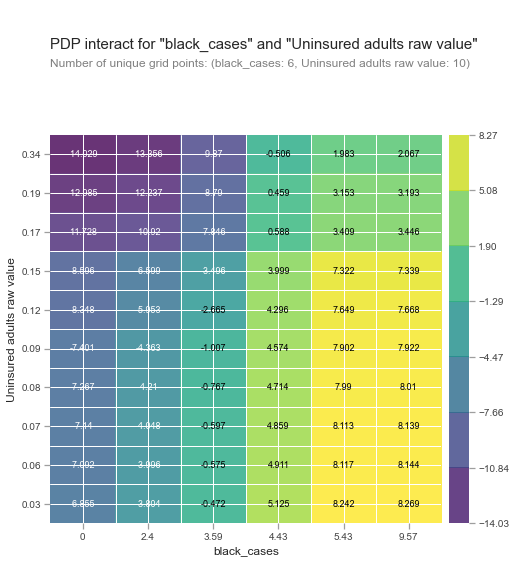

In [146]:
## plot
fig,ax = pdp.pdp_interact_plot(pdp_interact_out=inter4, 
                               feature_names=["black_cases",'Uninsured adults raw value'],
                               plot_type="grid")